In [2]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf


In [3]:
def Conv2D_Block(input_tensor , n_filters):
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  
  return x

In [4]:
def U_Net(img_tensor , n_filters = 16):
  conv1 = Conv2D_Block(img_tensor , n_filters * 1)
  pool1 = tf.keras.layers.MaxPooling2D((2 , 2))(conv1)
  pool1 = tf.keras.layers.Dropout(0.05)(pool1)
  
  conv2 = Conv2D_Block(pool1 , n_filters * 2)
  pool2 = tf.keras.layers.MaxPooling2D((2 , 2))(conv2)
  pool2 = tf.keras.layers.Dropout(0.05)(pool2)
  
  conv3 = Conv2D_Block(pool2 , n_filters * 4)
  pool3 = tf.keras.layers.MaxPooling2D((2 , 2))(conv3)
  pool3 = tf.keras.layers.Dropout(0.05)(pool3)
  
  conv4 = Conv2D_Block(pool3 , n_filters * 8)
  pool4 = tf.keras.layers.MaxPooling2D((2 , 2))(conv4)
  pool4 = tf.keras.layers.Dropout(0.05)(pool4)
  
  conv5 = Conv2D_Block(pool4 , n_filters * 16)
  
  pool6 = tf.keras.layers.Conv2DTranspose(n_filters * 8 , (3 , 3) , (2, 2) , padding = 'same')(conv5)
  pool6 = tf.keras.layers.concatenate([pool6 , conv4])
  pool6 = tf.keras.layers.Dropout(0.05)(pool6)
  conv6 = Conv2D_Block(pool6 , n_filters * 8)
  
  pool7 = tf.keras.layers.Conv2DTranspose(n_filters * 4 , (3 , 3) , (2 , 2) , padding = 'same')(conv6)
  pool7 = tf.keras.layers.concatenate([pool7 , conv3])
  pool7 = tf.keras.layers.Dropout(0.05)(pool7)
  conv7 = Conv2D_Block(pool7 , n_filters * 4)
  
  pool8 = tf.keras.layers.Conv2DTranspose(n_filters * 2 , (3 , 3) , (2 , 2) , padding = 'same')(conv7)
  pool8 = tf.keras.layers.concatenate([pool8 , conv2])
  pool8 = tf.keras.layers.Dropout(0.05)(pool8)
  conv8 = Conv2D_Block(pool8 , n_filters * 2)
  
  pool9 = tf.keras.layers.Conv2DTranspose(n_filters * 1 , (3 , 3) , (2 , 2) , padding = 'same')(conv8)
  pool9 = tf.keras.layers.concatenate([pool9 , conv1])
  pool9 = tf.keras.layers.Dropout(0.05)(pool9)
  conv9 = Conv2D_Block(pool9 , n_filters * 1)
  
  output = tf.keras.layers.Conv2D(1 , (1 , 1) , activation = 'sigmoid')(conv9)
  
  u_net = tf.keras.Model(inputs = [img_tensor] , outputs = [output])
  
  return u_net

In [5]:
import os
import re

In [6]:
# train_path = os.listdir('./train/')
# test_path = os.listdir('./test/')
trainpath = 'D:/JCM ELEKTRO ITS/Disertasi/Datasets/Brain Tumor/MadeByMeSegmentation/train'
testpath = 'D:/JCM ELEKTRO ITS/Disertasi/Datasets/Brain Tumor/MadeByMeSegmentation/test'
train_path = os.listdir(trainpath)
test_path = os.listdir(testpath)

print(len(train_path) , len(test_path))

130 80


In [7]:
reg = re.compile("[0-9]+")

temp1 = list(map(lambda x: reg.match(x).group(), train_path)) 
temp1 = list(map(int, temp1))

temp2 = list(map(lambda x: reg.match(x.split("_")[0]).group(), train_path))
temp2 = list(map(int, temp2))

train_path = [x for _,_,x in sorted(zip(temp1, temp2, train_path))]
train_path[:20]

['1.jpg',
 '1_mask.jpg',
 '2.jpg',
 '2_mask.jpg',
 '3.jpg',
 '3_mask.jpg',
 '4.jpg',
 '4_mask.jpg',
 '5.jpg',
 '5_mask.jpg',
 '6.jpg',
 '6_mask.jpg',
 '7.jpg',
 '7_mask.jpg',
 '8.jpg',
 '8_mask.jpg',
 '9.jpg',
 '9_mask.jpg',
 '10.jpg',
 '10_mask.jpg']

In [9]:
len(train_path)

130

In [8]:
train_image = []
train_mask = []

for index , item in enumerate(train_path):
  if index % 2 == 0:
    train_image.append(item)
  else:
    train_mask.append(item)

In [11]:
print(len(train_image))
print(len(train_mask))

65
65


In [18]:
train_mask

['1_mask.jpg',
 '2_mask.jpg',
 '3_mask.jpg',
 '4_mask.jpg',
 '5_mask.jpg',
 '6_mask.jpg',
 '7_mask.jpg',
 '8_mask.jpg',
 '9_mask.jpg',
 '10_mask.jpg',
 '11_mask.jpg',
 '12_mask.jpg',
 '13_mask.jpg',
 '14_mask.jpg',
 '15_mask.jpg',
 '16_mask.jpg',
 '17_mask.jpg',
 '18_mask.jpg',
 '19_mask.jpg',
 '20_mask.jpg',
 '21_mask.jpg',
 '22_mask.jpg',
 '23_mask.jpg',
 '24_mask.jpg',
 '25_mask.jpg',
 '26_mask.jpg',
 '27_mask.jpg',
 '28_mask.jpg',
 '29_mask.jpg',
 '30_mask.jpg',
 '31_mask.jpg',
 '32_mask.jpg',
 '33_mask.jpg',
 '34_mask.jpg',
 '35_mask.jpg',
 '36_mask.jpg',
 '37_mask.jpg',
 '38_mask.jpg',
 '39_mask.jpg',
 '40_mask.jpg',
 '41_mask.jpg',
 '42_mask.jpg',
 '43_mask.jpg',
 '44_mask.jpg',
 '45_mask.jpg',
 '46_mask.jpg',
 '47_mask.jpg',
 '48_mask.jpg',
 '49_mask.jpg',
 '50_mask.jpg',
 '51_mask.jpg',
 '52_mask.jpg',
 '53_mask.jpg',
 '54_mask.jpg',
 '55_mask.jpg',
 '56_mask.jpg',
 '57_mask.jpg',
 '58_mask.jpg',
 '59_mask.jpg',
 '60_mask.jpg',
 '61_mask.jpg',
 '62_mask.jpg',
 '63_mask.jpg',
 

In [9]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import skimage
import cv2

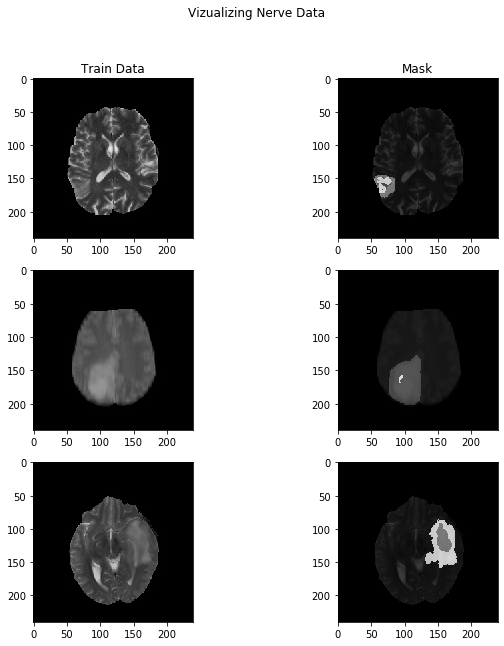

In [23]:
fig , ax = plt.subplots( 3, 2 , figsize=[10 , 10])
fig.suptitle('Vizualizing Nerve Data')
ax[0 , 0].set_title('Train Data')
ax[0 , 1].set_title('Mask')

# print(ax.shape)
for i in range(0 , 3):
  ind = random.randint(0 , len(train_image))
  img1 = np.array(cv2.imread(os.path.join(trainpath,(str(ind)+".jpg"))))
  ax[i , 0].imshow(img1 , cmap = 'gray')

  img2 = np.array(cv2.imread(os.path.join(trainpath,(str(ind)+"_mask.jpg"))))
  img2 = np.ma.masked_where(img2 == 0, img2)
  ax[i , 1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)
    
plt.show()

In [10]:
X = np.zeros((len(train_image), 128, 128, 1), dtype=np.float64)
y = np.zeros((len(train_image), 128, 128, 1), dtype=np.float64)

In [11]:
trainpath+train_image[0]

'D:/JCM ELEKTRO ITS/Disertasi/Datasets/Brain Tumor/MadeByMeSegmentation/train1.jpg'

In [12]:
import skimage.transform

for n , img_name in enumerate(train_image):
  img = cv2.imread(trainpath+"/"+img_name , cv2.IMREAD_GRAYSCALE)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  X[n] = in_img / 255.0
  
for n , img_name in enumerate(train_mask):
  img = cv2.imread(trainpath+"/"+img_name , cv2.IMREAD_GRAYSCALE)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  y[n] = in_img / 255.0

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [16]:
img_tensor = tf.keras.layers.Input((128 , 128 , 1) , name = 'img')
model = U_Net(img_tensor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [15]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('modelnerve.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [54]:
results = model.fit(X_train, y_train, batch_size=None, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

Train on 58 samples, validate on 7 samples
Epoch 1/50
32/58 [===============>..............] - ETA: 0s - loss: 14.0404 - acc: 0.8977
Epoch 00001: val_loss improved from inf to 4.28911, saving model to modelnerve.h5
58/58 [==============================] - 1s 20ms/step - loss: 13.0617 - acc: 0.8995 - val_loss: 4.2891 - val_acc: 0.7024
Epoch 2/50
32/58 [===============>..............] - ETA: 0s - loss: 14.2830 - acc: 0.8992
Epoch 00002: val_loss improved from 4.28911 to 4.11530, saving model to modelnerve.h5
58/58 [==============================] - 1s 15ms/step - loss: 13.0549 - acc: 0.8998 - val_loss: 4.1153 - val_acc: 0.8051
Epoch 3/50
32/58 [===============>..............] - ETA: 0s - loss: 14.4604 - acc: 0.9055
Epoch 00003: val_loss improved from 4.11530 to 3.94118, saving model to modelnerve.h5
58/58 [==============================] - 1s 15ms/step - loss: 13.0555 - acc: 0.9002 - val_loss: 3.9412 - val_acc: 0.8598
Epoch 4/50
32/58 [===============>..............] - ETA: 0s - loss: 14

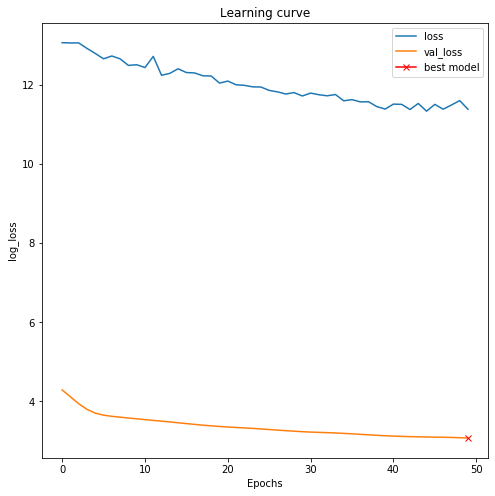

In [55]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [18]:
model.load_weights('D:\JCM ELEKTRO ITS\Disertasi\Deep Learning\Brain Tumor Segmentation\Testing U-NET\modelnerve.h5')

In [19]:
model.evaluate(X_valid, y_valid, verbose=1)

7/7 [==============================] - 2s 355ms/step


[3.0743448734283447, 0.8732212781906128]

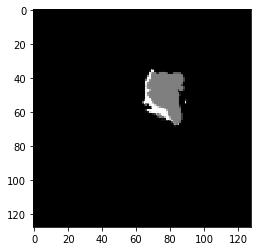

In [30]:
plt.imshow(y_valid[0].squeeze(), cmap='gray')

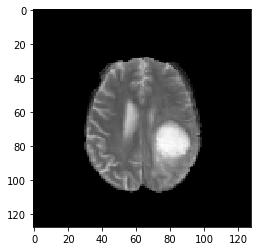

In [23]:
img_name = '11.jpg'
img = cv2.imread(testpath+"/"+img_name , cv2.IMREAD_GRAYSCALE)
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze(), cmap='gray')

In [24]:
prediction = model.predict(np.expand_dims(test , 0))

In [25]:
prediction.shape

(1, 128, 128, 1)

In [26]:
prediction.squeeze().shape

(128, 128)

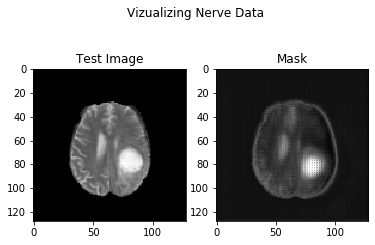

In [27]:
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Vizualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'gray', interpolation = 'none')


plt.show()

In [21]:
reg = re.compile("[0-9]+")

temp3 = list(map(lambda x: reg.match(x).group(), test_path)) 
temp3 = list(map(int, temp1))

temp4 = list(map(lambda x: reg.match(x.split("_")[0]).group(), test_path))
temp4 = list(map(int, temp2))

test_path = [x for _,_,x in sorted(zip(temp1, temp2, test_path))]
test_path[:20]

['1.jpg',
 '1_mask.jpg',
 '2.jpg',
 '2_mask.jpg',
 '3.jpg',
 '3_mask.jpg',
 '4.jpg',
 '10.jpg',
 '10_mask.jpg',
 '11.jpg',
 '11_mask.jpg',
 '12.jpg',
 '12_mask.jpg',
 '13.jpg',
 '13_mask.jpg',
 '14.jpg',
 '14_mask.jpg',
 '15.jpg',
 '15_mask.jpg',
 '16.jpg']

In [22]:
test_image = []
test_mask = []

for index , item in enumerate(test_path):
  if index % 2 == 0:
    test_image.append(item)
  else:
    test_mask.append(item)

In [23]:
print(len(test_image))
print(len(test_mask))

40
40


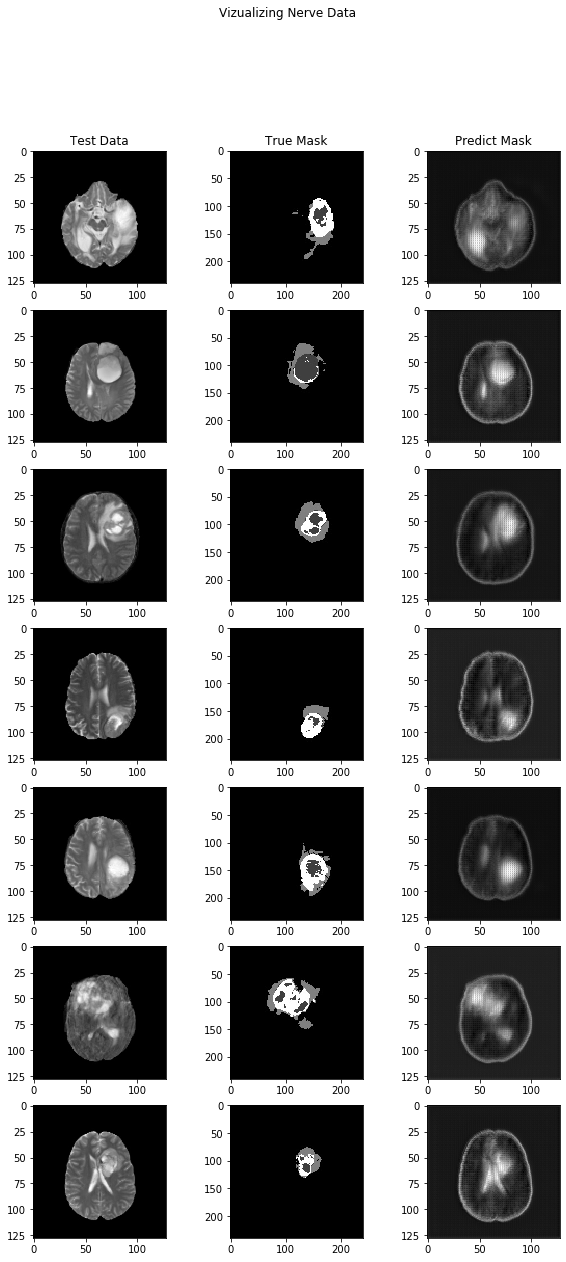

In [72]:
fig , ax = plt.subplots(7 , 3 , figsize=[10 , 20])
fig.suptitle('Vizualizing Nerve Data')
ax[0 , 0].set_title('Test Data')
ax[0 , 1].set_title('True Mask')
ax[0 , 2].set_title('Predict Mask')

# print(ax.shape)
for i in range(0 , 7):
  ind = random.randint(0 , len(test_image))
  img = np.array(cv2.imread(os.path.join(testpath,(str(ind)+".jpg"))))
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  test2 = in_img / 255.0
  img1 = test2.squeeze()
  prediction1 = model.predict(np.expand_dims(test2 , 0))
  ax[i , 0].imshow(img1 , cmap = 'gray')
    
  img_1 = np.array(cv2.imread(os.path.join(testpath,(str(ind)+".jpg"))))
  img2 = np.array(cv2.imread(os.path.join(testpath,(str(ind)+"_mask.jpg"))))
  img2 = np.ma.masked_where(img2 == 0, img2)
  ax[i , 1].imshow(img_1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 1].imshow(img2 , cmap = 'gray', interpolation = 'none')

  img3 = prediction1.squeeze()
  img3 = np.ma.masked_where(img3 == 0, img3)
  ax[i , 2].imshow(img1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 2].imshow(img3 , cmap = 'gray', interpolation = 'none')
  
plt.show()

In [24]:
X_test = np.zeros((len(test_image), 128, 128, 1), dtype=np.float64)
y_test = np.zeros((len(test_mask), 128, 128, 1), dtype=np.float64)
import skimage.transform

for n , img_name in enumerate(test_image):
  img = cv2.imread(testpath+"/"+img_name , cv2.IMREAD_GRAYSCALE)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  X_test[n] = in_img / 255.0
  
for n , img_name in enumerate(test_mask):
  img = cv2.imread(testpath+"/"+img_name , cv2.IMREAD_GRAYSCALE)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  y_test[n] = in_img / 255.0
    


In [25]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

Hasil_test = model.evaluate(X_test, y_test, verbose=1)
print ('Losing Score :',Hasil_test[0]) 
print ('Accuracy Score :',Hasil_test[1]) 

40/40 [==============================] - 1s 31ms/step
Losing Score : 15.728787612915038
Accuracy Score : 0.7198211669921875
